In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [77]:
df_06 = pd.read_csv('datasets/htx_2006_weather.csv', na_values='Blank').dropna()
df_10 = pd.read_csv('datasets/htx_2010_weather.csv', na_values='Blank').dropna()
df_11 = pd.read_csv('datasets/htx_2011_weather.csv', na_values='Blank').dropna()
df_12 = pd.read_csv('datasets/htx_2012_weather.csv', na_values='Blank').dropna() 
df_13 = pd.read_csv('datasets/htx_2013_weather.csv', na_values='Blank').dropna()
df_14 = pd.read_csv('datasets/htx_2014_weather.csv', na_values='Blank').dropna()
df_15 = pd.read_csv('datasets/htx_2015_weather.csv', na_values='Blank').dropna()
df_18 = pd.read_csv('datasets/htx_2018_weather.csv', na_values='Blank').dropna()
df_19 = pd.read_csv('datasets/htx_2019_weather.csv', na_values='Blank').dropna()
df_21 = pd.read_csv('datasets/htx_2021_weather.csv', na_values='Blank').dropna()

df = pd.concat([df_06, df_10, df_11, df_12, df_13, df_14, df_15, df_18, df_19, df_21])
# df = df_06

In [78]:
df.rain_tomorrow = df.rain_tomorrow.map(dict(Yes=1, No=0))

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3617 entries, 0 to 364
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3617 non-null   object 
 1   min_temp       3617 non-null   float64
 2   max_temp       3617 non-null   float64
 3   rainfall       3617 non-null   float64
 4   wind_speed9am  3617 non-null   float64
 5   wind_speed3pm  3617 non-null   float64
 6   humidity9am    3617 non-null   float64
 7   humidity3pm    3617 non-null   float64
 8   pressure9am    3617 non-null   float64
 9   pressure3pm    3617 non-null   float64
 10  cloud9am       3617 non-null   object 
 11  cloud3pm       3617 non-null   object 
 12  temp9am        3617 non-null   float64
 13  temp3pm        3617 non-null   float64
 14  rain_today     3617 non-null   object 
 15  rain_tomorrow  3617 non-null   int64  
dtypes: float64(11), int64(1), object(4)
memory usage: 480.4+ KB


In [80]:
rainfall = df['rainfall'].to_numpy()


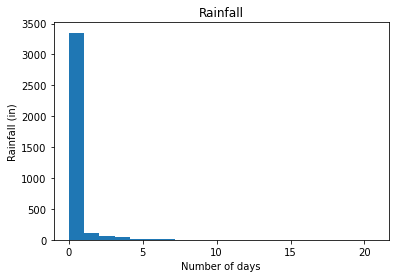

In [81]:
plt.hist(rainfall, bins=20)

plt.xlabel("Number of days")
plt.ylabel("Rainfall (in)")
plt.title("Rainfall")

plt.show()

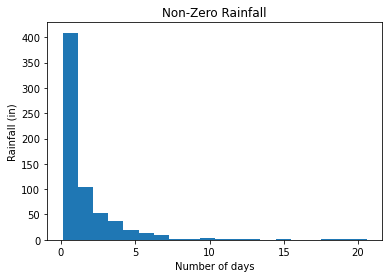

In [82]:
non_zero_rainfall = rainfall[rainfall != 0]
plt.hist(non_zero_rainfall, bins=20)

plt.xlabel("Number of days")
plt.ylabel("Rainfall (in)")
plt.title("Non-Zero Rainfall")

plt.show()

plt.show() 

In [83]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [84]:
test

,date,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,rain_today,rain_tomorrow
319,2021-11-16,64.0,83.0,0.0,10.0,12.0,71.0,47.0,30.06,29.97,Fair,Partly Cloudy,74.0,83.0,No,0
232,2015-08-21,74.0,88.0,1.6,5.0,0.0,93.0,55.0,29.99,29.88,Light Rain,Mostly Cloudy,74.0,88.0,Yes,0
194,2014-07-14,78.0,92.0,0.0,9.0,15.0,67.0,59.0,29.99,29.92,Partly Cloudy,Mostly Cloudy,85.0,90.0,No,0
271,2015-09-29,70.0,88.0,0.1,10.0,10.0,76.0,53.0,29.80,29.74,Partly Cloudy,Mostly Cloudy,77.0,88.0,Yes,0
156,2014-06-06,75.0,89.0,0.0,9.0,10.0,69.0,61.0,29.90,29.89,Partly Cloudy,Partly Cloudy,84.0,87.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,2012-02-25,46.0,56.0,0.0,5.0,7.0,40.0,37.0,30.36,30.29,Cloudy,Cloudy,52.0,55.0,No,0
219,2012-08-07,78.0,95.0,0.0,5.0,7.0,72.0,47.0,29.94,29.87,Partly Cloudy,Mostly Cloudy,85.0,95.0,No,1
149,2011-05-30,78.0,91.0,0.0,18.0,17.0,59.0,50.0,29.92,29.90,Partly Cloudy,Partly Cloudy,87.0,90.0,No,0
254,2021-09-12,75.0,91.0,0.0,9.0,12.0,61.0,43.0,30.03,29.98,Fair,Mostly Cloudy,85.0,89.0,No,1


In [85]:
x_train = train[['min_temp', 
                'max_temp', 
                # 'wind_speed9am', 
                # 'wind_speed3pm', 
                'humidity9am', 
                'humidity3pm', 
                'pressure9am', 
                'pressure3pm', 
                'temp9am', 
                'temp3pm',
                'rainfall'
                ]]
# x_train = train[['humidity3pm', 'pressure3pm']]

y_train = train[['rain_tomorrow']]

In [86]:
x_test = test[['min_temp', 
                'max_temp', 
                # 'wind_speed9am', 
                # 'wind_speed3pm', 
                'humidity9am', 
                'humidity3pm', 
                'pressure9am', 
                'pressure3pm', 
                'temp9am', 
                'temp3pm',
                'rainfall'
                ]]

y_test = test[['rain_tomorrow']]

In [87]:
model = LogisticRegression()  
model.fit(x_train, y_train)

/Users/ancheypeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ancheypeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
# plt.scatter(x_train, y_train,color='g')
# plt.plot(x_train, model.predict(x_train),color='k')

# plt.show()

In [89]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [90]:
print('R squared: {:.2f}'.format(model.score(x_train,y_train)*100))

R squared: 81.57


In [91]:
print('R squared: {:.2f}'.format(model.score(x_test,y_test)*100))

R squared: 82.32
